## Taking the unit prices of BTC and ETH with RestAPI and analyzing them on candlestick charts

In [ ]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import plotly.graph_objects as go

In [115]:
cg=CoinGeckoAPI()
#RestAPI module

### Data Prep

In [175]:
def candlestick_dataPreper(coin_name):
    
    try:
        
        coin_data=cg.get_coin_market_chart_by_id(id=coin_name,vs_currency="usd",days=30)

        coin_price_data=coin_data["prices"]

        dataCoin=pd.DataFrame(coin_price_data,columns=["TimeStamp","Price"])

        dataCoin["Date"]=pd.to_datetime(dataCoin["TimeStamp"],unit="ms")

        candlestick_dataCoin=dataCoin.groupby(dataCoin.Date.dt.date).agg({"Price":["min","max","first","last"]})
        
        return candlestick_dataCoin
        
    except:
        
        print("Please enter the coin name correctly..")
        
#For the generic coding of the collecting the data in the pd.DataFrame

In [176]:
candlestick_dataBTC=candlestick_dataPreper("bitcoin")
candlestick_dataETH=candlestick_dataPreper("ethereum")

### Data Visualization

In [181]:
def figDrawer(candlestick_data,coin_name,vs_currency):
    
    fig=go.Figure(data=[go.Candlestick(x=candlestick_data.index,
                    open=candlestick_data["Price"]["first"],
                    high=candlestick_data["Price"]["max"],
                    low=candlestick_data["Price"]["min"],
                    close=candlestick_data["Price"]["last"])
                    ])
    
    fig.update_layout(xaxis_rangeslider_visible=False,xaxis_title="Date",yaxis_title="Price ({})".format(vs_currency)
                  ,title="{} Candlestick Chart Over {} Days".format(coin_name,candlestick_dataBTC.index.shape[0]))
    
    return fig

#For the generic coding of the visualize the data

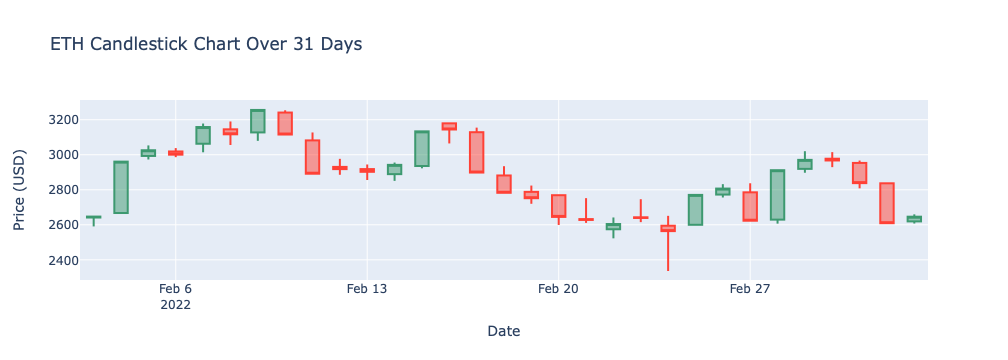

In [186]:
figDrawer(candlestick_dataETH,"ETH","USD")

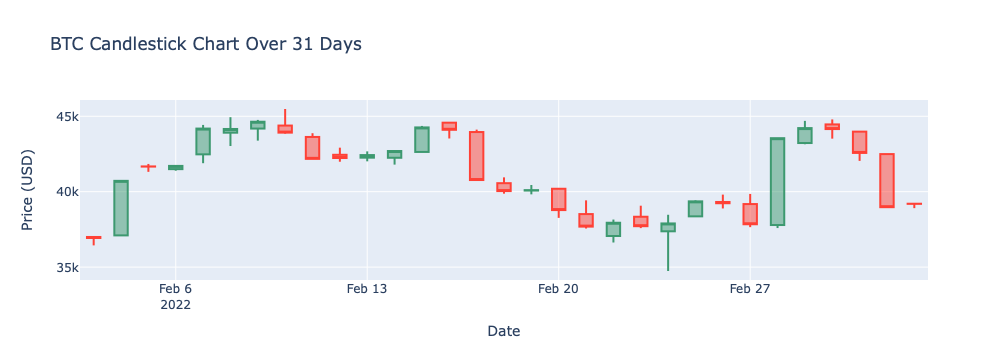

In [188]:
figDrawer(candlestick_dataBTC,"BTC","USD")